In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np


In [2]:
memo = imread('../figs/memo.jpg')

In [5]:
memo.shape

(720, 1080, 3)

In [7]:
memo_bw = np.mean(memo,-1)
memo_bw.shape

(720, 1080)

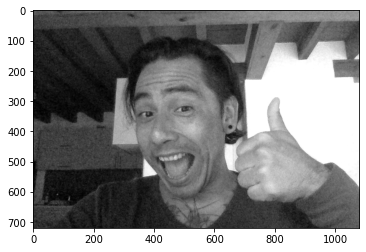

In [9]:
fig, ax = plt.subplots()
ax.imshow(memo_bw,cmap='gray')

In [18]:
U, S, VT = np.linalg.svd(memo_bw,full_matrices=False)
S = np.diag(S)


In [12]:
U.shape

(720, 720)

In [13]:
VT.shape

(720, 1080)

In [20]:
S[:,:5]


array([[112304.89997069,      0.        ,      0.        ,
             0.        ,      0.        ],
       [     0.        ,  17288.62222142,      0.        ,
             0.        ,      0.        ],
       [     0.        ,      0.        ,  12874.29773917,
             0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        ,
             0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        ,
             0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        ,
             0.        ,      0.        ]])

In [17]:
S[:,:5]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [22]:
 U[:,:5]

array([[-0.03345752, -0.05248385, -0.00126576,  0.00299939, -0.05078548],
       [-0.03339957, -0.05294462, -0.0015144 ,  0.00251496, -0.04744453],
       [-0.03329397, -0.05311482, -0.00095035,  0.00163496, -0.04439248],
       ...,
       [-0.01346099, -0.02918592,  0.00217383,  0.00780675, -0.00116084],
       [-0.01345666, -0.02890788,  0.0024282 ,  0.00746696,  0.00015649],
       [-0.01339689, -0.02840347,  0.00185473,  0.00621256,  0.00040291]])

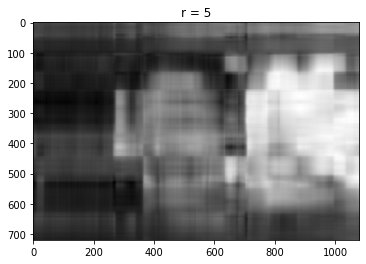

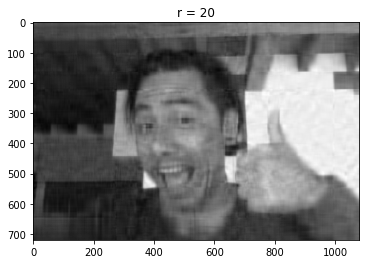

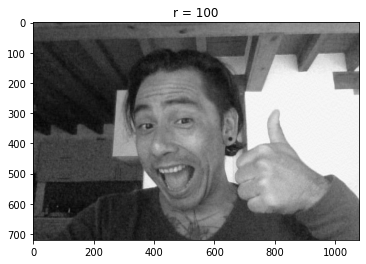

In [21]:

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.show()

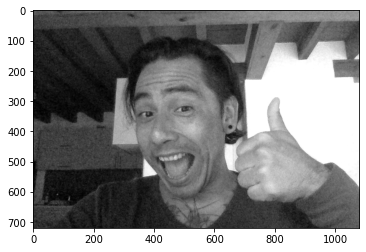

In [23]:
fig, ax = plt.subplots()
ax.imshow(memo_bw,cmap='gray')

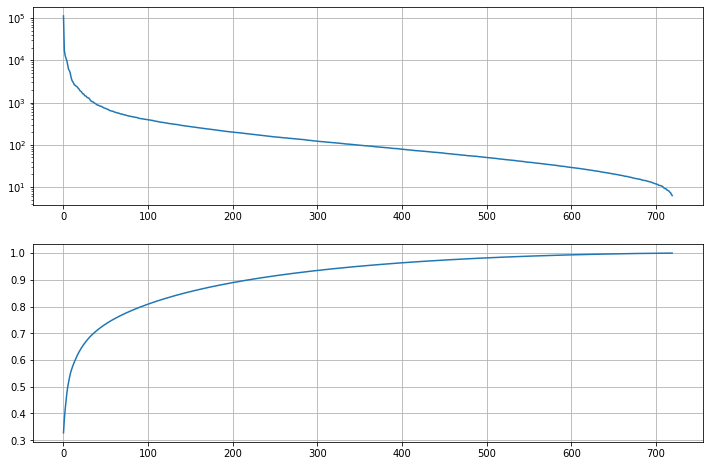

In [24]:
fig, ax = plt.subplots(2,figsize=(12,8))

ax[0].semilogy(np.diag(S))

ax[1].plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))


for i in range(2):
    ax[i].grid()
